#  RED WINE QUALITY ANALYSIS

 Data is related to quality of red wine. Below are the 12 attributes which is going to explore

1.fixed acidity
2.volatile acidity
3.citric acid
4.residual sugar
5.chlorides
6.free sulfur dioxide
7.total sulfur dioxide
8.density
9.pH
10.sulphates
11.alcohol
12.quality --output(response) variable

In [224]:
# Importing needed packages for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [225]:
# Loading wine data  from local path
wine_data =pd.read_csv("C:/Users/Vivek/Documents/PythonBasics/ProjectDatasets/Project_3_Wine Quality data/winequality.csv",sep =";")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [226]:
#no.of records and no.of columns
wine_data.shape

(1599, 12)

In [227]:
#Information about each columns
wine_data.info() #All 12 columns are numeric ,not null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [228]:
# Describe the data
wine_data.describe() #no negative /invalid values

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


###    From the above details ,it is clear that file contains 1599 records and as when roughly checked ,there are no missing data


In [229]:
#any null values ?
wine_data.isnull().sum() # no null values as we cleared it while taken the info

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [230]:
#formating column names for easy coding
wine_data.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'},inplace= True)
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [231]:
#For checking duplicate records
dup_value = wine_data[wine_data.duplicated(keep = 'first')]
dup_value

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
76,8.8,0.410,0.64,2.20,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
91,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
93,7.7,0.490,0.26,1.90,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5
102,8.1,0.545,0.18,1.90,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
105,8.1,0.575,0.22,2.10,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5


In [232]:
#out of 1599 records,240 rows are duplicates or with same quality wines. 
#Assuming it as same quality wines from different testers and keeping the duplicate values
dup_value.shape

(240, 12)

In [233]:
# for finding the unique values from the output variable(quality)
wine_data.quality.unique()#5,6,7,4,8,3 are the quality which we have 

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [234]:
#checking how many records are available for each quality
wine_data.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

## PICTURIZING THE DATA

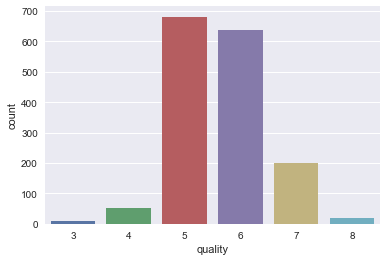

In [235]:
sbn.countplot(x='quality',data= wine_data)

#### from above graph range of response variable is 3 to 8

### changing the quality as good or bad by making quality<6 is 'bad' and rest is 'good'

In [236]:
conditions = [(wine_data['quality'] >5),(wine_data['quality']<=5)]
rating = ['good','bad']
wine_data['rating'] =np.select(conditions,rating)
wine_data.rating.value_counts()

good    855
bad     744
Name: rating, dtype: int64

In [237]:
wine_data.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
bad,8.142204,0.589503,0.237755,2.542070,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,4.901882
good,8.474035,0.474146,0.299883,2.535965,0.082661,15.272515,39.352047,0.996467,3.310643,0.692620,10.855029,6.274854


### Corelation between response and predicted variables

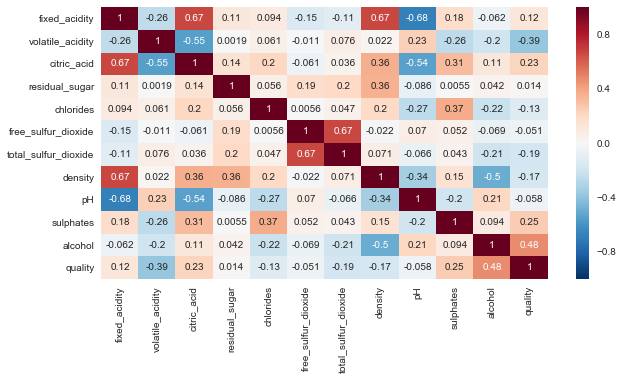

In [238]:
correlation = wine_data.corr()
plt.figure(figsize=(10,5))
sbn.heatmap(correlation,annot= True)

In [239]:
correlation['quality'].sort_values()

volatile_acidity       -0.390558
total_sulfur_dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free_sulfur_dioxide    -0.050656
residual_sugar          0.013732
fixed_acidity           0.124052
citric_acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

### from the above data ,we can figure out 'alcohol,sulphates,citric_acid and fixed_acidity' having Maximum correlation with quality--- residual sugar is less 0.01 can be make as 0

### we can remove other attributes and keep only 4 now 'alcohol,sulphates,citric_acid and fixed_acidity' for further analysis

## 4 attribute analysis with rating

### 1.alcohol and residual sugar

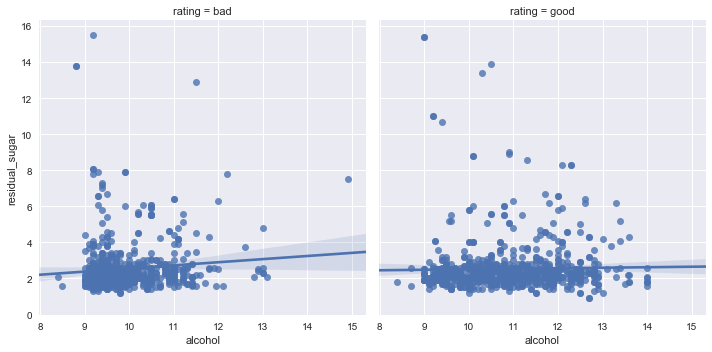

In [240]:
sbn.lmplot(x='alcohol',y='residual_sugar',col='rating',data= wine_data)

In [241]:
#### From the above graph it is clear that residual sugar increeses with alcohol content for bad quality wine. 
####  So for manufacturing good red wine , control alcohol and residual sugar

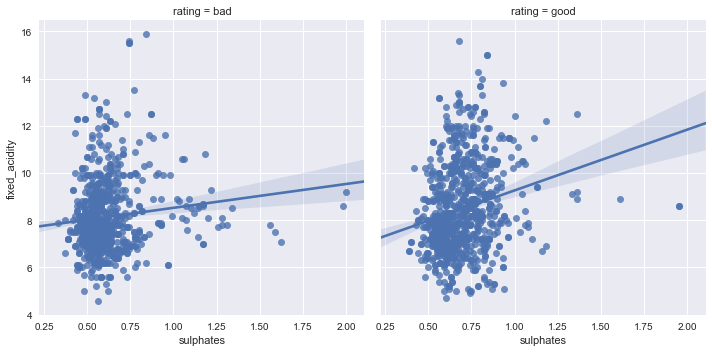

In [242]:
sbn.lmplot(x='sulphates',y='fixed_acidity',col='rating',data=wine_data)

### From the above graph , there is a small reflection only in bad wine but for good wine sulphate and fixed acidity is increasing
### So fixed acidity should be checked while adding sulphates

#### NOTE: other combination of attributes doesn't show any big change in the regression line . So ignoring for now

##  1. Classification using Logistic regression

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [244]:
# Variable selection
input_col = ['alcohol','sulphates','citric_acid','fixed_acidity']
output_col = 'rating'
x= wine_data[input_col]
y= wine_data[output_col]

# splitting for test and train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

# fitting the model
log_reg = LogisticRegression()
log_model = log_reg.fit(x_train,y_train)

print(log_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [245]:
#PREDICTION WITH LOGISTIC REGRESSION
log_pred = log_model.predict(x_test)
print('--Accuracy score--')
log_ac = accuracy_score(y_test,log_pred)
print(log_ac)
print('**************************')

print('--Confusion matrix--')
log_conf = confusion_matrix(y_test,log_pred)
print(log_conf)
print('**************************')

print('--Classification Report--')
log_class= classification_report(y_test,log_pred)
print(log_class)

--Accuracy score--
0.725
**************************
--Confusion matrix--
[[112  42]
 [ 46 120]]
**************************
--Classification Report--
             precision    recall  f1-score   support

        bad       0.71      0.73      0.72       154
       good       0.74      0.72      0.73       166

avg / total       0.73      0.72      0.73       320



## from the above we got 72.5% accuaracy from our logistic regression model


In [246]:
#checking the data
test_data= x_test.join(y_test)
test_data[test_data['rating'] =='good'].count()

alcohol          166
sulphates        166
citric_acid      166
fixed_acidity    166
rating           166
dtype: int64

In [247]:
test_data= x_test.join(y_test)
test_data[test_data['rating'] =='bad'].count()

alcohol          154
sulphates        154
citric_acid      154
fixed_acidity    154
rating           154
dtype: int64

### out of 172 good wine ,my model figured 126 good and out of 148 bad wine,it predicted 109. Let me try the same data in  random forest

## 2. RANDOM FOREST

In [248]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
rand_clf=RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 10, random_state = 123)
rand_model=rand_clf.fit(x_train,y_train)
print(rand_model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False)


In [249]:
#PREDICTION WITH RANDOM FOREST
rand_predict=rand_model.predict(x_test)

log_pred = log_model.predict(x_test)
print('--Accuracy score--')
log_ac = accuracy_score(y_test,log_pred)
print(log_ac)
print('**************************')

print('--Confusion matrix--')
log_conf = confusion_matrix(y_test,log_pred)
print(log_conf)
print('**************************')

print('--Classification Report--')
log_class= classification_report(y_test,log_pred)
print(log_class)

--Accuracy score--
0.725
**************************
--Confusion matrix--
[[112  42]
 [ 46 120]]
**************************
--Classification Report--
             precision    recall  f1-score   support

        bad       0.71      0.73      0.72       154
       good       0.74      0.72      0.73       166

avg / total       0.73      0.72      0.73       320



## Random forest also has the same 72.5% accuracy 

##  3. Now checking with SVM (Support Vector Machine) and will compare with other two algorithms

In [250]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [258]:
label = y
predictors = x #prev.value

scaler_model = MinMaxScaler().fit_transform(predictors.values)
bins = np.linspace(0, 1, 10)
digitized = np.digitize(scaler_model, bins)

In [259]:
svm_model = svm.SVC()
svm_model.fit(X=digitized,y=label.values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [262]:
score_knn = cross_val_score(svm_model, digitized, label.values, cv=4)
print("Cross Validation score : " + str(score_knn))
print("Cross Validation Mean score : " + str(score_knn.mean()))

Cross Validation score : [ 0.6275      0.6875      0.785       0.66917293]
Cross Validation Mean score : 0.692293233083


In [261]:
#PREDICTION WITH SVM

svm_pred = svm_model.predict(X=digitized)
print('--Accuracy score--')
svm_ac = accuracy_score(label.values,svm_pred)
print(svm_ac)
print('**************************')

print('--Confusion matrix--')
svm_conf = confusion_matrix(label.values,svm_pred)
print(svm_conf)
print('**************************')

print('--Classification Report--')
svm_class= classification_report(label.values,svm_pred)
print(svm_class)

--Accuracy score--
0.739837398374
**************************
--Confusion matrix--
[[542 202]
 [214 641]]
**************************
--Classification Report--
             precision    recall  f1-score   support

        bad       0.72      0.73      0.72       744
       good       0.76      0.75      0.76       855

avg / total       0.74      0.74      0.74      1599



## WITH SVM MODEL WE HAVE GOT 73.9% ACCURACY

# CONCLUSION

## Comparing with 3 algorithms SVM give better accuracy

###  ************* THANK YOU ***********